In [3]:
from sklearn.externals import joblib

finalMergedDF = joblib.load('../finalMergedDF.pkl') 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from pandas import DataFrame
from pandas import concat

from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

del finalMergedDF['time']
# del finalMergedDF['rolling_mean_mood']
# del finalMergedDF['mood_mean_difference']

cols = list(finalMergedDF)
cols.insert(0, cols.pop(cols.index('mood')))
finalMergedDF = finalMergedDF.ix[:,cols]

values = finalMergedDF.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1,1)
reframed.drop(reframed.columns[[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]], axis=1, inplace=True)
print(reframed)

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.500        0.1        1.0   0.444444        0.2        0.2   
2        0.500        0.0        1.0   0.555556        0.0        0.3   
3        0.500        0.0        1.0   0.444444        0.0        0.3   
4        0.375        0.0        1.0   0.333333        0.0        0.4   
5        0.500        0.0        1.0   0.555556        0.0        0.5   
6        0.625        0.2        1.0   0.666667        0.0        0.3   
7        0.625        0.0        1.0   0.666667        0.0        0.4   
8        0.625        0.0        1.0   0.777778        0.1        0.4   
9        0.250        0.2        1.0   0.333333        0.7        0.8   
10       0.375        0.1        1.0   0.333333        0.0        0.9   
11       0.375        0.0        1.0   0.222222        0.1        0.9   
12       0.625        0.1        1.0   0.777778        0.0        0.4   
13       0.625        0.2        1.0   0.555556    

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [6]:
values = reframed.values
n_train_hours = 500
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(500, 1, 146) (500,) (195, 1, 146) (195,)


Train on 500 samples, validate on 195 samples
Epoch 1/50
 - 1s - loss: 0.2841 - val_loss: 0.2144
Epoch 2/50
 - 0s - loss: 0.1721 - val_loss: 0.1611
Epoch 3/50
 - 0s - loss: 0.1491 - val_loss: 0.1173
Epoch 4/50
 - 0s - loss: 0.1518 - val_loss: 0.1274
Epoch 5/50
 - 0s - loss: 0.1402 - val_loss: 0.1364
Epoch 6/50
 - 0s - loss: 0.1295 - val_loss: 0.1253
Epoch 7/50
 - 0s - loss: 0.1267 - val_loss: 0.1263
Epoch 8/50
 - 0s - loss: 0.1225 - val_loss: 0.1272
Epoch 9/50
 - 0s - loss: 0.1188 - val_loss: 0.1251
Epoch 10/50
 - 0s - loss: 0.1161 - val_loss: 0.1264
Epoch 11/50
 - 0s - loss: 0.1124 - val_loss: 0.1243
Epoch 12/50
 - 0s - loss: 0.1098 - val_loss: 0.1245
Epoch 13/50
 - 0s - loss: 0.1069 - val_loss: 0.1233
Epoch 14/50
 - 0s - loss: 0.1052 - val_loss: 0.1245
Epoch 15/50
 - 0s - loss: 0.1023 - val_loss: 0.1245
Epoch 16/50
 - 0s - loss: 0.0997 - val_loss: 0.1244
Epoch 17/50
 - 0s - loss: 0.0976 - val_loss: 0.1238
Epoch 18/50
 - 0s - loss: 0.0965 - val_loss: 0.1257
Epoch 19/50
 - 0s - loss: 0

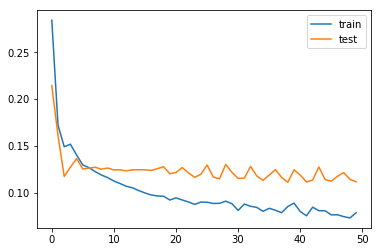

In [7]:
import matplotlib.pyplot as plt 
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [167]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# make a prediction
yhat = DataFrame(model.predict(test_X))
test_X = DataFrame(test_X.reshape((test_X.shape[0], test_X.shape[2])))
# invert scaling for forecast
inv_yhat = concat((yhat, test_X.iloc[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = DataFrame(test_y.reshape((len(test_y), 1)))
inv_y = concat((test_y, test_X.iloc[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('r-squared: %f'%(r2_score(inv_y, inv_yhat)))

Test RMSE: 0.525
r-squared: -0.005045


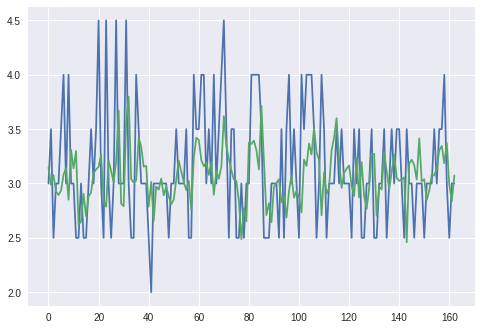

In [161]:
plt.plot(inv_y)
plt.plot(inv_yhat)